In [8]:
from subprocess import Popen, PIPE
import subprocess
import re
from ipwhois import IPWhois

def get_traceroute_results(destination):
    traceroute_command = ['tracert', '-d', '-w', '1000', destination]
    result = subprocess.run(traceroute_command, capture_output=True, text=True)
    output = result.stdout.splitlines()
    return output

def extract_ip_addresses(traceroute_results):
    ip_addresses = []
    first_ip = True
    for line in traceroute_results:
        match = re.search(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', line)
        if match:
            if not first_ip:
                ip = match.group()
                ip_addresses.append(ip)
            else:
                first_ip = False
    return ip_addresses

def is_private_ip(ip_address):
    octets = ip_address.split('.')
    first_octet = int(octets[0])
    if first_octet == 10:
        return True
    elif first_octet == 172 and 16 <= int(octets[1]) <= 31:
        return True
    elif first_octet == 192 and int(octets[1]) == 168:
        return True
    else:
        return False

def get_as_information(ip_address):
    obj = IPWhois(ip_address)
    result = obj.lookup_rdap()
    as_info = result['asn_description']
    return as_info

def start_tracing(destination):
    traceroute_results = get_traceroute_results(destination)
    ip_addresses = extract_ip_addresses(traceroute_results)
    for ip in ip_addresses:
        if is_private_ip(ip):
            print(f"Gizli IP bulundu. IP: {ip} - AS Bilgisi: Gizli olduğundan bulunamadı.")
        else:
            as_info = get_as_information(ip)
            print(f"IP: {ip} - AS Bilgisi: {as_info}")

def main():
    web_sites = [
        "www.google.com",          # ABD
        "www.zoomer.ge",           # Gürcistan
        "www.huawei.com",          # Çin
        "www.lemonde.fr",          # Fransa
        "www.nic.com.au",          # Avustralya
        "www.airtel.com",          # Hindistan
        "www.yandex.ru",           # Rusya
        "www.alibaba.com",         # Çin 
        "www.bbc.co.uk",           # Birleşik Krallık
        "www.naver.com",           # Güney Kore
        "www.terra.com.br",        # Brezilya
        "www.mynet.com",           # Türkiye
        "www.lanacion.com.ar",     # Arjantin
        "www.arabtimesonline.com", # Kuveyt
        "www.welt.de",             # Almanya
        "www.canada.ca",           # Canada
        "www.mtv.com",             # ABD
        "www.megafon.uz",          # Özbekistan
        "www.canadapost.ca",       # Canada
        "www.africa.com"           # Afrika
    ]
    
    for site in web_sites:
        print(f"{site} sitesi için Traceroute başlamıştır.")
        start_tracing(site)
        print(f"{site} sitesi için Traceroute bitmiştir.\n")
            
if __name__ == '__main__':
    main()

www.google.com sitesi için Traceroute başlamıştır.
Gizli IP bulundu. IP: 10.5.134.1 - AS Bilgisi: Gizli olduğundan bulunamadı.
Gizli IP bulundu. IP: 10.1.255.1 - AS Bilgisi: Gizli olduğundan bulunamadı.
IP: 193.140.109.5 - AS Bilgisi: TOBBETU-NET, TR
Gizli IP bulundu. IP: 10.59.116.217 - AS Bilgisi: Gizli olduğundan bulunamadı.
Gizli IP bulundu. IP: 10.40.177.243 - AS Bilgisi: Gizli olduğundan bulunamadı.
Gizli IP bulundu. IP: 10.36.109.29 - AS Bilgisi: Gizli olduğundan bulunamadı.
Gizli IP bulundu. IP: 10.40.130.106 - AS Bilgisi: Gizli olduğundan bulunamadı.
Gizli IP bulundu. IP: 10.40.170.219 - AS Bilgisi: Gizli olduğundan bulunamadı.
IP: 72.14.212.96 - AS Bilgisi: GOOGLE, US
IP: 216.239.62.49 - AS Bilgisi: GOOGLE, US
IP: 142.251.52.83 - AS Bilgisi: GOOGLE, US
IP: 142.250.187.100 - AS Bilgisi: GOOGLE, US
www.google.com sitesi için Traceroute bitmiştir.

www.zoomer.ge sitesi için Traceroute başlamıştır.
Gizli IP bulundu. IP: 10.5.134.1 - AS Bilgisi: Gizli olduğundan bulunamadı.
Gizli 

IP: 193.140.109.5 - AS Bilgisi: TOBBETU-NET, TR
Gizli IP bulundu. IP: 10.59.116.217 - AS Bilgisi: Gizli olduğundan bulunamadı.
Gizli IP bulundu. IP: 10.40.177.243 - AS Bilgisi: Gizli olduğundan bulunamadı.
Gizli IP bulundu. IP: 10.40.130.106 - AS Bilgisi: Gizli olduğundan bulunamadı.
Gizli IP bulundu. IP: 10.36.6.142 - AS Bilgisi: Gizli olduğundan bulunamadı.
Gizli IP bulundu. IP: 10.40.171.169 - AS Bilgisi: Gizli olduğundan bulunamadı.
IP: 212.156.150.29 - AS Bilgisi: TTNET, TR
IP: 81.212.217.1 - AS Bilgisi: TTNET, TR
IP: 81.212.212.253 - AS Bilgisi: TTNET, TR
IP: 2.17.236.183 - AS Bilgisi: TTNET, TR
www.naver.com sitesi için Traceroute bitmiştir.

www.terra.com.br sitesi için Traceroute başlamıştır.
Gizli IP bulundu. IP: 10.5.134.1 - AS Bilgisi: Gizli olduğundan bulunamadı.
Gizli IP bulundu. IP: 10.1.255.1 - AS Bilgisi: Gizli olduğundan bulunamadı.
IP: 193.140.109.5 - AS Bilgisi: TOBBETU-NET, TR
IP: 193.140.85.209 - AS Bilgisi: ULAKNET, TR
IP: 193.140.13.75 - AS Bilgisi: ULAKNET, TR


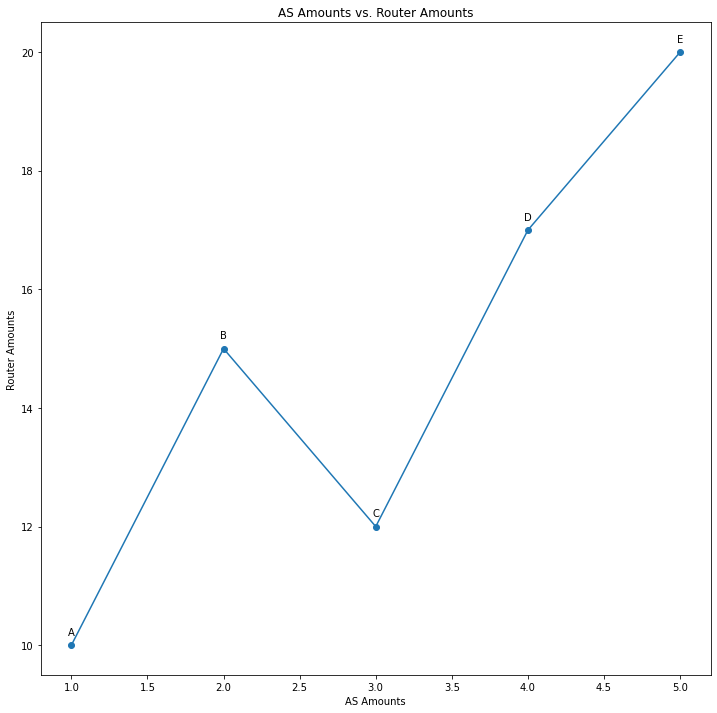

In [14]:
import matplotlib.pyplot as plt

def router_as_plot(as_amounts, router_amounts, point_labels, website_name):
    plt.figure(figsize=(12, 12)) 
    plt.plot(as_amounts, router_amounts, marker='o')
    
    for i, label in enumerate(point_labels):
        plt.annotate(label, (as_amounts[i], router_amounts[i]), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.xlabel('AS Amounts')
    plt.ylabel('Router Amounts')
    plt.title(f'AS Amounts vs. Router Amounts for {website_name}')
    
    plt.show()